# Linearna regresija

Linearnom regresijom, metodom najmanjih kvadrata, traži se linearna veza između ulaznih (nezavisnih promenljivih, atributa) i izalznih (zavisnih) promenljivih, koja najbolje (u srednje kvadratnom smislu) "objašnjava" date podatke.

U terminologiji mašinskog učenja ovo je problem nadgledanog učenja (supervised learning), a dati podaci se nazivaju obučavajući skup (training data).

### Na jednostavnom primeru pokazaćemo 5 načina kako može da se uradi regresija u python-u.

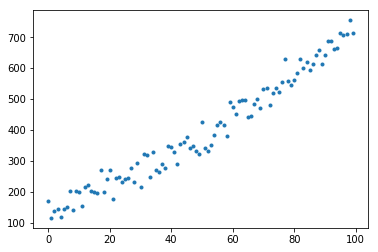

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# vestacki generisemo podatke (obucavajuci skup) pretpostavljajuci šum normalne raspodele:

# Uvodimo (namerno) i malu kvadratnu zavisnost:
x = np.arange(100)
y = 150 + 3*x + 0.03*x**2 + 30*np.random.normal(size=len(x))

# plotujemo podatke:

plt.plot(x,y, '.')
plt.show()

### 1. način (rucno izracunavanje):

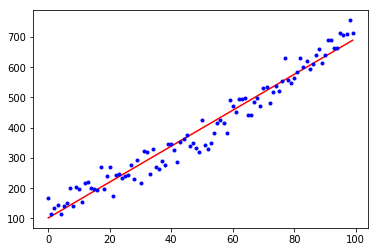

In [2]:
n = len(x)    

Sxx = np.sum(x**2) - n*np.mean(x)**2
#    Syy = np.sum(y**2) - np.sum(y)**2/n    # ovde ne korisitmo
Sxy = np.sum(x*y) - n*np.mean(x)*np.mean(y)    
mean_x = np.mean(x)
mean_y = np.mean(y)

# Izvedene formule za linearnu regresiju sa predavanja:
a = Sxy/Sxx
b = mean_y - a*mean_x


# plotovanje prave
y_est_lin = b+a*x  # estimirane vrednosti y
plt.plot(x,y_est_lin,'r-',x,y,'b.')
plt.show()

### 2. način (analitičko rešenje iz numpy.linalg (linearna algebra) biblioteke):

In [3]:
# a) Cista linearna regresija (provlacimo pravu kroz podatke):

# Kreiramo matricu ulaznih podataka:

# na x dodajemo vektor sa svim jedinicama: ono sto dobijemo da mnozi taj vektor je ofset (pomeraj, intercept):   
M1 = np.vstack( (np.ones_like(x), x) ).T  
    
# np.linalg.lstsq resava jednacinu cije su resenje parametri regresione prave: 
p1 = np.linalg.lstsq(M1, y)   
# p1[0] su parametri prave: ako je prava y=a+bx, onda je a=p1[0][0], b=p1[0][1]
w1=p1[0]  # a=w1[0], b=w1[1]
print(w1)  #
 

[ 101.76061041    5.93164558]


In [4]:
# plotovanje prave
y_est_lin = w1[0]+w1[1]*x  # estimirane vrednosti y
plt.plot(x,y_est_lin,'r-',x,y,'.')

plt.show()

In [5]:
# Posto je sum relativno mali, ovde se vidi da postoji i neka nelinearna zavisnost!

In [6]:
# a) Kvadratna regresija (provlacimo parabolu kroz podatke)

#  I dalje radimo linearnu regresiju, samo dodajemo jos jedan ulazni atribut!

In [7]:
M2 = np.vstack( (np.ones_like(x), x, x**2) ).T   # dodajemo i kvadrate ulaznih promenljivih!

p2 = np.linalg.lstsq(M2, y)   
w2=p2[0]  
print(w2) 
    


[  1.43862068e+02   3.35400534e+00   2.60367701e-02]


In [8]:
# plotovanje parabole:
y_est_parabola = w2[0]+w2[1]*x+w2[2]*x**2 # regresiona parabola
plt.plot(x,y,'.',x,y_est_parabola,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[  1.39772364e+02   3.86254682e+00   1.31300673e-02   8.69138233e-05]


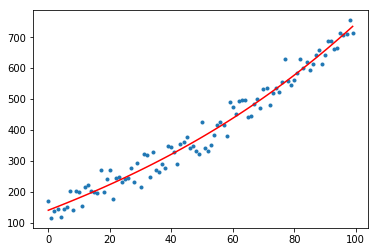

In [9]:
# a) Kubna regresija (provlacimo polinom treceg stepena kroz podatke)

M3 = np.vstack( (np.ones_like(x), x, x**2, x**3) ).T

p3 = np.linalg.lstsq(M3, y)
     
w3=p3[0]  
print(w3) 

# plotovanje:
y_est_kub = w3[0]+w3[1]*x+w3[2]*x**2+w3[3]*x**3 # regresiona parabola
plt.plot(x,y,'.',x,y_est_kub,'r')

plt.show()


In [10]:
# dobili smo da je koeficijent koji mnozi x**3 skoro nula!

### 3. način (koristeci alate iz statsmodels biblioteke):

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2346.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.93e-70
Time:                        17:22:47   Log-Likelihood:                -497.42
No. Observations:                 100   AIC:                             998.8
Df Residuals:                      98   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.7606      7.018     14.501      0.0

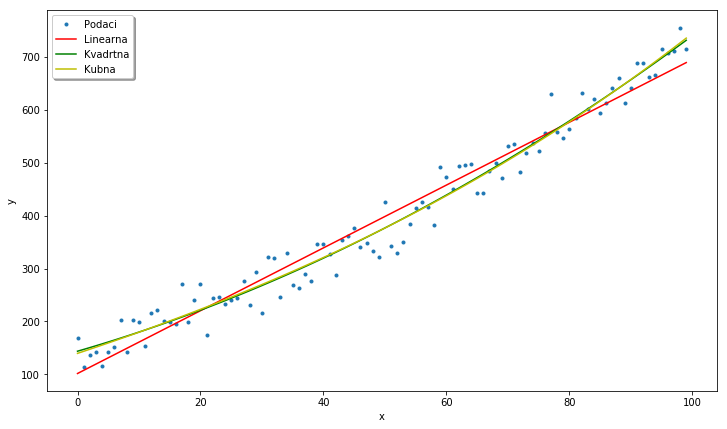

In [11]:
import statsmodels.api as sm
    
Res1 = sm.OLS(y, M1).fit()  # OLS - Ordinary Least Square
Res2 = sm.OLS(y, M2).fit()
Res3 = sm.OLS(y, M3).fit()
    
# U objektu koji vraca .OLS sadrzane su mnogo statisticke informacije o rezultatu regresije    
# .summary vraca rezime vaznih karakteristika:
print(Res1.summary())
print(Res2.summary())
print(Res3.summary())

# Svakoj karakteristici se moze pristupiti posebno, 
# npr. .fittedvalues su vrednosti regresione funkcije u tackama x na kojima je obucavan regresor
# npr. .conf_int() vraca 95% intervale poverenja za parametre

print(Res1.conf_int())
    
# plotovanje
plt.plot(x,y, '.', label='Podaci')
plt.plot(x, Res1.fittedvalues, 'r', label='Linearna')
plt.plot(x, Res2.fittedvalues, 'g', label='Kvadrtna')
plt.plot(x, Res3.fittedvalues, 'y', label='Kubna')
plt.legend(loc='upper left', shadow=True)
plt.xlabel('x')
plt.ylabel('y')

plt.gcf().set_size_inches(12,7)

plt.show()

#### Interpretacija rezulata:

#### Df Residuals - broj podataka (Observations) minus broj parametara koje estimiramo
#### Df Model - broj nezavisnih prmenljivih (u ovom slucaju samo jedna: x)
#### R squared - kvadrat indeksa krivolinijske korelacije
#### Adj. R-squared: modifikovan R^2, tako da se bolje uzima u obzir broj parametara (kaznjava koriscenje velikog broja parametara!)
#### F-statistic - vrednost statistike koja se koristi za testiranje hipoteze (H0) da je y nezavisno (u zdruzenom smislu) od svih nezavisnih promenljivih (velika vrednost je u korist odbacivanja hipoteze H0)
####  Prob (F-statistic) - p-vrednost testa, mala vrednost znaci da cemo odbaciti hipotezu o nezavisnosti sa malim nivoom znacajnosti: $\alpha \geq p$
####  Log-Likelihood - Logaritam verodostojnosti dobijenih parametara
#### AIC, BIC - Mere koje govore o kvalitetu modela - manja vrednost znaci bolji model! (bolje kaznjavaju kompleksne modele od R vrednosti)
#### std err - standardna greska (estimacija standardne devijacije) ocena parametara
#### t - vrednost t statistike za testiranje hipoteze (H0) da je y nezavisno od odgovarajuceg x
#### P>|t|  - p -vrednost testa (mala vrednost znaci da odbacujemo hipotezu H0 sa velikom sigurnoscu - malim nivoom znacajnosti)
#### [0.025      0.975] - 95% interval poverenja za parametre
#### Omnibus - test normalnosti reziduala (H0 je hipoteza da jeste normalna raspodela suma!)
#### Prob(Omnibus) - p-vrednost testa normalnosti (jako mala vrednost znaci da odbacujemo hipotezu da je sum normalan!)
####  Skew - ocena nesimetricnosti raspodele reziduala (za normalnu raspodelu (simetricna je)) treba da bude 0
#### Kurtosis - mera "tezine" repova gustine respodele (normalna PDF ima vrednost 3), npr. t-raspodela ima "lakse" repove i time  vecu ovu vrednost
#### Durbin-Watson - mera autokorelacije kod reziduala (prema modelu bi trebalo da su nezavisni, vrednost oko 2 ukazuje na nekorelisanost tj. nezavisnost reziduala)
#### Jarque-Bera (JB) - jos jedan test normalnosti
#### Prob(JB) - p vrednost, jako mala vrednost znaci da odbacujemo hipotezu o normalnosti sa malim nivoom znacajnosti
#### Cond. No. - mera korelisanosti ulaznih promenljivih

### 4. način (isto koristeci alate iz statsmodels biblioteke, ali pomocu formule - u stilu programskog jezika R):

In [12]:
import pandas as pd
import statsmodels.formula.api as smf

# Pretvaramo podatke u Pandas DataFrame da bismo im pristupili po imenima koristeci statsmodel formule

df = pd.DataFrame({'x':x, 'y':y})

# Fitovanje: statsmodel sam formira regresionu (ulaznu) matricu na osnovu interpretacije formule
# Koristi se jezik za opis formula definisan u biblioteci Patsy
Res1F = smf.ols('y~x', df).fit()
Res2F = smf.ols('y ~ x+I(x**2)', df).fit()  # kvadrati ulaza moraju da se specificiraju pomocu I()!
Res3F = smf.ols('y ~ x+I(x**2)+I(x**3)', df).fit()

print(Res1F.summary())
print(Res2F.summary())
print(Res3F.summary())

#Res1.conf_int()
#Res1F.conf_int()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2346.
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.93e-70
Time:                        17:22:47   Log-Likelihood:                -497.42
No. Observations:                 100   AIC:                             998.8
Df Residuals:                      98   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.7606      7.018     14.501      0.0

## Primer 2 - intervali poverenja za regresionu krivu

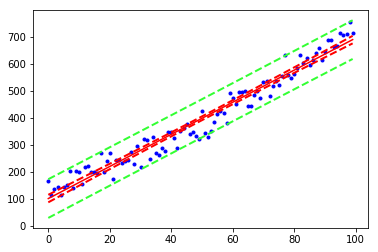

In [13]:
# Rucno izracunavanje intervala poverenja:

n = len(x)    

Sxx = np.sum(x**2) - n*np.mean(x)**2
#    Syy = np.sum(y**2) - np.sum(y)**2/n    # ovde ne korisitmo
Sxy = np.sum(x*y) - n*np.mean(x)*np.mean(y)    
mean_x = np.mean(x)
mean_y = np.mean(y)

# Izvedene formule za linearnu regresiju sa predavanja:
a = Sxy/Sxx
b = mean_y - a*mean_x

# Reziduali:
fit = lambda xx: b + a*xx    # sa lambda se moze definisati python funkcija u jednoj liniji
res = y - fit(x)

var_res = np.sum(res**2)/(n-2)  # estimacija varijanse reziduala
sd_res = np.sqrt(var_res)  # std reziduala


alpha=0.05

Kvantil = stats.t.isf(alpha/2., n-2) # Kvantil t-raspodele za intervale poverenja

ip_za_sv     = lambda x: sd_res * np.sqrt(  1./n + (x-mean_x)**2/Sxx)
ip_za_predikciju = lambda x: sd_res * np.sqrt(1+1./n + (x-mean_x)**2/Sxx)

plt.figure()

plt.plot(x,y,'b.')
plt.plot(x,fit(x),'r-')

x.sort()
plt.plot(x, fit(x)+Kvantil*ip_za_sv(x), 'r--', lw=2)
plt.plot(x, fit(x)-Kvantil*ip_za_sv(x), 'r--', lw=2 )

plt.plot(x, fit(x)+Kvantil*ip_za_predikciju(x), '--', lw=2, color=(0.2,1,0.2))
plt.plot(x, fit(x)-Kvantil*ip_za_predikciju(x), '--', lw=2, color=(0.2,1,0.2))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     199.7
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           2.21e-26
Time:                        17:22:48   Log-Likelihood:                -36.603
No. Observations:                  50   AIC:                             81.21
Df Residuals:                      46   BIC:                             88.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4780      0.028     17.336      0.0

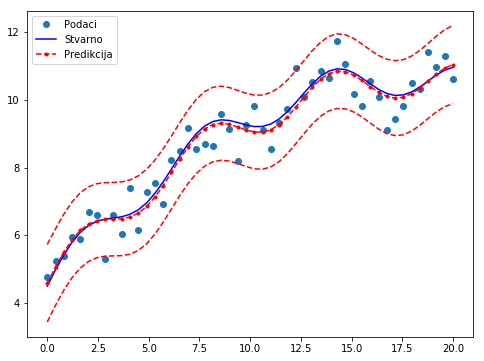

In [14]:
# Intervali poverenja koriscenjem ugradjenih funkcija:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# generisemo hipoteticke podatke:
broj_uzoraka = 50
sig = 0.5  #standardna devijacija suma
x = np.linspace(0, 20, broj_uzoraka)

#Matrica ulaznih podataka (linearna+sinusoidalna+kvadratna zavisnost):
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(broj_uzoraka)))

beta = [0.5, 0.5, -0.02, 5.]

y_stvarno = np.dot(X, beta) # ovo je ono sto idealno treba da dobijemo
y = y_stvarno + sig * np.random.normal(size=broj_uzoraka)  # ovo su izlazi y sa sumom


res = sm.OLS(y, X).fit()  # standardno OLS fitovanje
print(res.summary())

# Plotujemo rezulatate regresije:

#Intervali poverenja za dobijenu regresionu krivu se mogu dobiti pomocu: wls_prediction_std komande:
prstd, ip_dole, ip_gore = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Podaci")
ax.plot(x, y_stvarno, 'b-', label="Stvarno")
ax.plot(x, res.fittedvalues, 'r--.', label="Predikcija")
# intervali poverenja:
ax.plot(x, ip_gore, 'r--') 
ax.plot(x, ip_dole, 'r--')
ax.legend(loc='best')
plt.show()

# Regresija na konkretnim podacima

## Primer 1: Uzecemo podatke o vezi izmedju prodaje cigareta i alkohola u raznim gradovima Engleske:

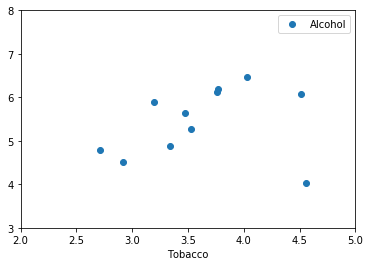

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats


# Ucitavanje podataka:
df=pd.read_csv('alc_tob.csv')

# plotovanje
df.plot('Tobacco', 'Alcohol', style='o')

plt.xlim([2,5])
plt.ylim([3,8])
plt.show()


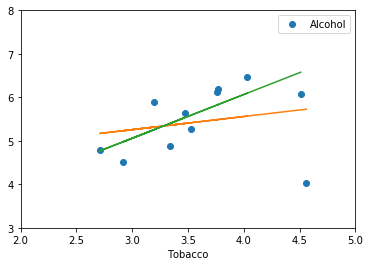

In [16]:
Rez1= sm.ols('Alcohol ~ Tobacco', df).fit()
Rez2 = sm.ols('Alcohol ~ Tobacco', df[:-1]).fit()  # iskljucujemo poslednju tacku koja deluje kao "outlier"
df.plot('Tobacco', 'Alcohol', style='o')
plt.plot(df.Tobacco, Rez1.fittedvalues)
plt.plot(df.Tobacco[:-1], Rez2.fittedvalues)
plt.xlim([2,5])
plt.ylim([3,8])
plt.show()

In [17]:
# Rezime regresije:
print(Rez1.summary())
print(Rez2.summary())

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.4735
Date:                Thu, 20 Dec 2018   Prob (F-statistic):              0.509
Time:                        17:22:48   Log-Likelihood:                -12.317
No. Observations:                  11   AIC:                             28.63
Df Residuals:                       9   BIC:                             29.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3512      1.607      2.708      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [18]:
# Vidimo ogromnu razliku u R^2 indeksu u ova dva slucaja (sa i bez outlier-a)!

## 5. nacin za regresiju  (koristeci popularnu biblioteku za masinsko ucenje: sklearn )

In [19]:
from sklearn.linear_model import LinearRegression

#scikit-learn je najnapredniji i najpopularniji open source paket za MASINSKO UCENJE
# regresija je naravno sadrzana i u tom paketu

# ovde je vazno da se radi sa matricama! :

data = np.matrix( df )

# sada kreiramo regresione objekte i fitujemo podatke:

cln = LinearRegression()  # izbacen outlier
org = LinearRegression()   # originalni skup

X, Y = data[:,2], data[:,1]
cln.fit( X[:-1], Y[:-1] )  # fitujemo model bez outlier-a
org.fit( X, Y )   # sa svim podacima

print(cln.score( X[:-1], Y[:-1] ) )  # .score je R^2 indeks
print(org.score( X, Y ))
    
# plotujemo podatke (outlier je prikazan zvedicom):
plt.plot( df.Tobacco[:-1], df.Alcohol[:-1], 'bo')
plt.plot( df.Tobacco[-1:], df.Alcohol[-1:], 'r*',ms=20, lw=10)
plt.xlim([2,5])
plt.ylim([3,8]) 

# Ono cemu najcesce sluzi (obuceni) model je da se vrsi posle predikcija za y u novim tackama X (skup za testiranje - test data):

# generisemo nove tacke:

test = np.c_[np.arange(2.5, 4.85, 0.1)]  # mora da bude vektor kolona! np._c_ pravi vektor kolonu (mogli smo sa np.marix pa da transponujemo)

plt.plot( test, cln.predict( test ), 'k' )
plt.plot( test, org.predict( test ), 'k--' )

plt.show()


0.615106600554
0.0499844902759


## Primer 2: modelovanje veze između visine i težine ljudi

In [20]:
HW=pd.read_csv('hw_25000.csv')  #ucitavamo podatke o visinama i tezinama 25000 ljudi
print(HW.head())
HW=HW.iloc[:,1:] # izbacujemo prvu kolonu jer nije dobar format
print(HW.head())
HW.columns=['Height','Weight']  # dajemo imena kolonama
HW.head()

   Index   "Height(Inches)"   "Weight(Pounds)"
0      1           65.78331           112.9925
1      2           71.51521           136.4873
2      3           69.39874           153.0269
3      4           68.21660           142.3354
4      5           67.78781           144.2971
    "Height(Inches)"   "Weight(Pounds)"
0           65.78331           112.9925
1           71.51521           136.4873
2           69.39874           153.0269
3           68.21660           142.3354
4           67.78781           144.2971


Height    Weight
0  65.78331  112.9925
1  71.51521  136.4873
2  69.39874  153.0269
3  68.21660  142.3354
4  67.78781  144.2971

In [21]:
HW.describe()

Height        Weight
count  25000.000000  25000.000000
mean      67.993114    127.079421
std        1.901679     11.660898
min       60.278360     78.014760
25%       66.704397    119.308675
50%       67.995700    127.157750
75%       69.272958    134.892850
max       75.152800    170.924000

In [22]:
# linearna regresija na 2. nacin:

A=np.array(HW['Height'])
A=np.array([np.ones(len(A)),A])
y=np.array(HW['Weight'])
print(A.shape,y.shape)

w1 = np.linalg.lstsq(A.T,y)[0] # parametri
w1

(2, 25000) (25000,)


array([-82.57574306,   3.08347645])

In [23]:
# funkcija koja racuna fitovanu vrednost u tacki x, za date parametre w
def f(x,w):
    return w[0]+w[1]*x

In [24]:
ax=HW.plot(kind='scatter',s=1,x='Height',y='Weight',figsize=[10,8])
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plt.show()

## Vezbanje 1: uraditi regresiju na ovom primeru na ostala 4 nacina!
## Vezbanje 2: uraditi obrnutu regresiju - zavisnost visine od tezine (nece se dobiti ista kriva!)

### Polinomska regresija visine i tezine:

In [25]:
# Pretpostavimo da imamo modifikovane podatke koji se bolje fituju polinomom:
HW['P2']=HW['Weight']+(HW['Height']-68)**2

In [26]:
# linearna regresija na modifikovanim podacima:
A=np.array(HW['Height'])
A=np.array([np.ones(len(A)),A])
y=np.array(HW['P2'])

w1 = np.linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print('w1=',w1)
def f(x,w):
    return w[0]+w[1]*x

ax=HW.plot(kind='scatter',s=1,x='Height',y='P2',figsize=[10,8])
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k')
plt.show()

w1= [-77.29147795   3.05894484]


w2= [  4.57718628e+03  -1.33969361e+02   1.00774285e+00]


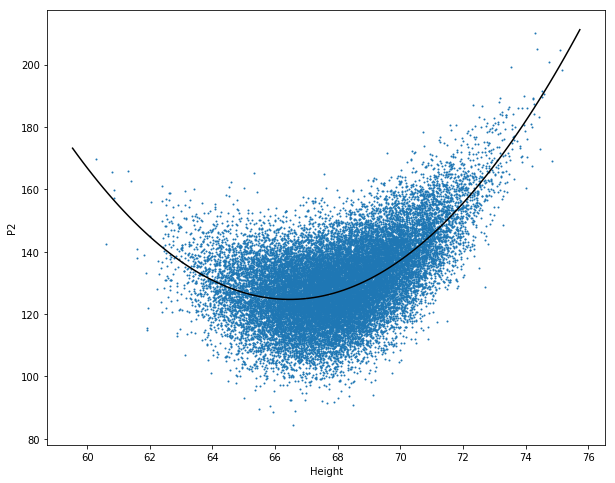

In [27]:
# kvadratna regresija:

A=np.array(HW['Height'])
A=np.array([np.ones(len(A)),A,A**2])
y=np.array(HW['P2'])

w2 = np.linalg.lstsq(A.T,y)[0] 
print('w2=',w2)
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2

ax=HW.plot(kind='scatter',s=1,x='Height',y='P2',figsize=[10,8])
x0,x1=plt.xlim()

opseg=x1-x0
X=np.arange(x0,x1,opseg/100.)
ax.plot(X,f2(X,w2),'k')
plt.show()

# Višestruka regresija

### Do sada smo modelovali zavisnost između dve promenljive. Sada ćemo videti da se slično može modelovati zavisnost jedne (zavisne) promenljive od više nezavisnih promenljivih:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols


# Ucitavanje podataka (vreme plivanja na 100m u zavisnosti od godine i pola):
df=pd.read_csv('swim100m.csv')
df.head()

year  time sex
0  1905  65.8   M
1  1908  65.6   M
2  1910  62.8   M
3  1912  61.6   M
4  1918  61.4   M

In [29]:
model1 = ols("time ~ sex", df).fit()  # model nezavisan od godine
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     24.13
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           7.28e-06
Time:                        17:22:51   Log-Likelihood:                -219.23
No. Observations:                  62   AIC:                             442.5
Df Residuals:                      60   BIC:                             446.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1923      1.517     42.986      0.0

In [30]:
model2 = ols("time ~ sex + year", df).fit()   # zavisnost od dva faktora
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     159.6
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           1.58e-24
Time:                        17:22:51   Log-Likelihood:                -172.12
No. Observations:                  62   AIC:                             350.2
Df Residuals:                      59   BIC:                             356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    555.7168     33.800     16.441      0.0

In [31]:
model3 = ols("time ~ sex * year", df).fit()   # dva faktora + njihova interakcija (proizvod)
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     162.1
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           3.67e-28
Time:                        17:22:51   Log-Likelihood:                -160.30
No. Observations:                  62   AIC:                             328.6
Df Residuals:                      58   BIC:                             337.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       697.3012     39.221     17.779